In [1]:
# Load packages and settings
# %matplotlib widget
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_ALL, '') 
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

import datetime
#from datetime import date


# ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

saveFigures = False
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: False
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../variant data/" 
path_figs = os.getcwd() +"/../Figures/" 

In [3]:
#list_of_loc = ["DK","P","SA","DE"]
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
#Choose country
loc = list_of_loc[3]

#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

In [4]:
#get our world in data, data
df_owid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df_owid['date'] =  pd.to_datetime(df_owid['date'], format='%Y-%m-%d')

#Choose loc
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates
#start = min(BA4_prop['date'].min(),BA5_prop['date'].min(),BA4_cases['date'].min(),BA5_cases['date'].min())
start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]
#df_owid_loc = (df_owid_loc['date'] > start) & (df_owid_loc['date'] <= end)

## Make figures

## Lineage prominence vs new cases

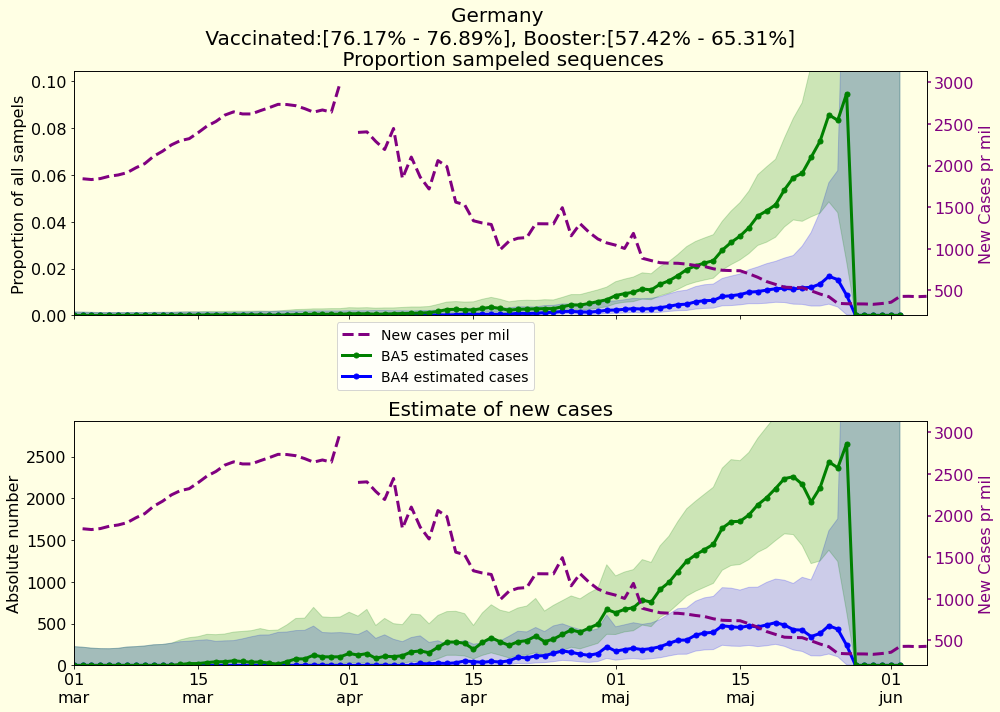

In [5]:
fig1, (ax1,ax2) = plt.subplots(2,1, figsize=(14,10), sharex=True)

fig1.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')
#Sampels
ax1.plot(BA4_prop['date'], BA4_prop['estimatedCases'], label="BA4 sampels", color='b', linestyle='-', marker=".")
ax1.fill_between(BA4_prop['date'], BA4_prop['estimatedCasesCILower'], BA4_prop["estimatedCasesCIUpper"], color='b', alpha=.2)

ax1.plot(BA5_prop['date'], BA5_prop['estimatedCases'], label="BA5 sampels", color='g', linestyle='-', marker=".")
ax1.fill_between(BA5_prop['date'], BA5_prop['estimatedCasesCILower'], BA5_prop["estimatedCasesCIUpper"], color='g', alpha=.2)
ax1.set_ylabel("Proportion of all sampels")


ymax = max([BA4_prop['estimatedCases'].max(),BA5_prop['estimatedCases'].max()])
ymax = 1.1*ymax
ax1.set_ylim([0,ymax])

#Cases
ax2.plot(BA4_cases['date'], BA4_cases['estimatedCases'], label="BA4 estimated cases", color='b', linestyle='-', marker=".")
ax2.fill_between(BA4_cases['date'], BA4_cases['estimatedCasesCILower'], BA4_cases["estimatedCasesCIUpper"], color='b', alpha=.2)

ax2.plot(BA5_cases['date'], BA5_cases['estimatedCases'], label="BA5 estimated cases", color='g', linestyle='-', marker=".")
ax2.fill_between(BA5_cases['date'], BA5_cases['estimatedCasesCILower'], BA5_cases["estimatedCasesCIUpper"], color='g', alpha=.2)
ax2.set_ylabel("Absolute number")

ax1b = ax1.twinx()
ax1b.plot(df_owid_loc['date'],df_owid_loc['new_cases_smoothed_per_million'], label="New cases per mil", color="purple",linestyle='--')
ax1b.set_ylabel("New Cases pr mil")
ax1b.yaxis.label.set_color("purple")


ax2b = ax2.twinx()
ax2b.plot(df_owid_loc['date'],df_owid_loc['new_cases_smoothed_per_million'], label="New cases per mil", color="purple",linestyle='--')
ax2b.set_ylabel("New Cases pr mil")
ax2b.yaxis.label.set_color("purple")


tkw = dict(size=4, width=1.5)
ax1b.tick_params(axis='y', colors="purple", **tkw)
ax2b.tick_params(axis='y', colors="purple", **tkw)

ax1.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
ymax = 1.1*ymax
ax2.set_ylim([0,ymax])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

vac = f"{df_owid_loc['people_fully_vaccinated_per_hundred'].iloc[0]}% - {df_owid_loc['people_fully_vaccinated_per_hundred'].dropna().iloc[-1]}%"
booster = f"{df_owid_loc['total_boosters_per_hundred'].iloc[0]}% - {df_owid_loc['total_boosters_per_hundred'].dropna().iloc[-1]}%"

#df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])

ax1.set_title(f"{loc} \n Vaccinated:[{vac}], Booster:[{booster}] \n Proportion sampeled sequences")

ax2.set_title(f"Estimate of new cases")

legend_elements = [ Line2D([0], [0],  label="New cases per mil", color="purple",linestyle='--'),
                       Line2D([0],[0],label="BA5 estimated cases", color='g', linestyle='-', marker="."),
                       Line2D([0],[0], label="BA4 estimated cases", color='b', linestyle='-', marker=".") ]

ax1.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(0.3,0),fontsize=14) #bbox_to_anchor=(1.2,0), loc='center left',fontsize=14
plt.tight_layout()



if saveFigures:
    fig1.savefig(path_figs+f'/Variance figures/{loc} BA4 and BA5 vs New Cases',bbox_inches='tight')

### Betyder det flere cases hvis der BA.4 og eller BA.5 for stor andel af tilfælde?
Det ser ud som om antallet af cases stiger lige umiddelbart efter linagen overtager.

Det kunne godt ligne en ny lille bølje

## Linagesvs hospitals and deaths

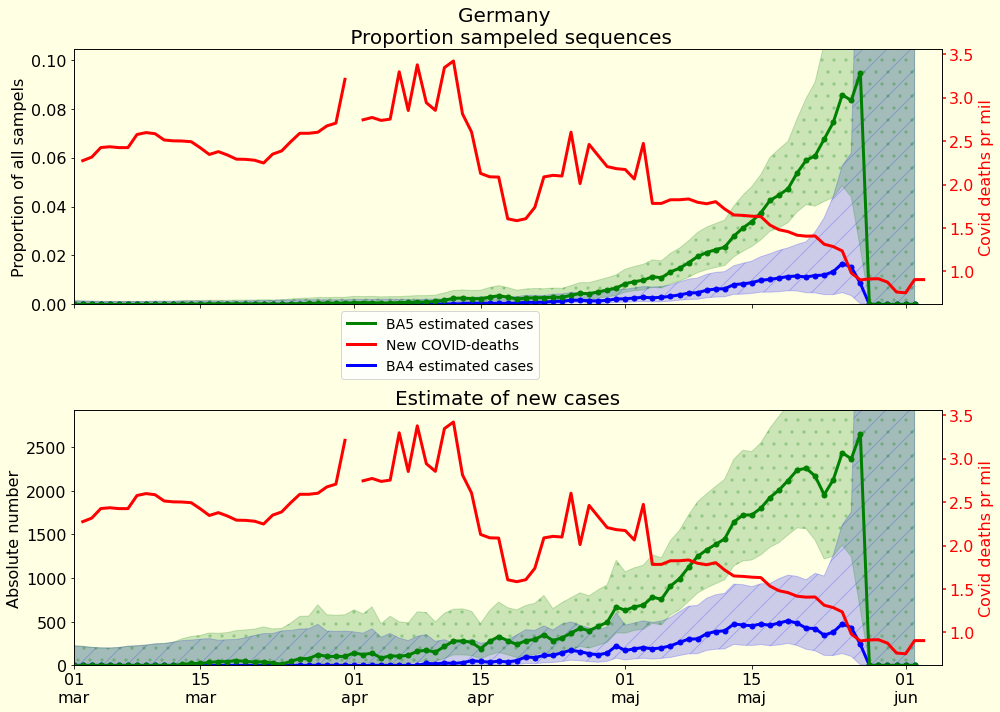

In [6]:
fig2, (ax1,ax2) = plt.subplots(2,1, figsize=(14,10), sharex=True)

fig2.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')

c1,c2,c3 = "green","blue","red"

#Sampels
ax1.plot(BA4_prop['date'], BA4_prop['estimatedCases'], label="BA4 sampels", color='b', linestyle='-', marker=".")
ax1.fill_between(BA4_prop['date'], BA4_prop['estimatedCasesCILower'], BA4_prop["estimatedCasesCIUpper"], color='b', alpha=.2, hatch='/')

ax1.plot(BA5_prop['date'], BA5_prop['estimatedCases'], label="BA5 sampels", color='g', linestyle='-', marker=".")
ax1.fill_between(BA5_prop['date'], BA5_prop['estimatedCasesCILower'], BA5_prop["estimatedCasesCIUpper"], color='g', alpha=.2, hatch='.')
ax1.set_ylabel("Proportion of all sampels")


ymax = max([BA4_prop['estimatedCases'].max(),BA5_prop['estimatedCases'].max()])
ymax = 1.1*ymax
ax1.set_ylim([0,ymax])

#Cases
ax2.plot(BA4_cases['date'], BA4_cases['estimatedCases'], label="BA4 estimated cases", color='b', linestyle='-', marker=".")
ax2.fill_between(BA4_cases['date'], BA4_cases['estimatedCasesCILower'], BA4_cases["estimatedCasesCIUpper"], color='b', alpha=.2, hatch='/')

ax2.plot(BA5_cases['date'], BA5_cases['estimatedCases'], label="BA5 estimated cases", color='g', linestyle='-', marker=".")
ax2.fill_between(BA5_cases['date'], BA5_cases['estimatedCasesCILower'], BA5_cases["estimatedCasesCIUpper"], color='g', alpha=.2, hatch='.')
ax2.set_ylabel("Absolute number")


ax1b = ax1.twinx()
ax1b.plot(df_owid_loc['date'],df_owid_loc['new_deaths_smoothed_per_million'], label="New COVID-deaths", color=c3, linestyle='-',)
ax1b.set_ylabel("Covid deaths pr mil")
ax1b.yaxis.label.set_color(c3)


ax2b = ax2.twinx()
ax2b.plot(df_owid_loc['date'],df_owid_loc['new_deaths_smoothed_per_million'], label="New COVID-deaths", color=c3, linestyle='-')
ax2b.set_ylabel("Covid deaths pr mil")
ax2b.yaxis.label.set_color(c3)


tkw = dict(size=4, width=1.5)
ax1b.tick_params(axis='y', colors=c3, **tkw)
ax2b.tick_params(axis='y', colors=c3, **tkw)

ax1.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
ymax = 1.1*ymax
ax2.set_ylim([0,ymax])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_title(f"{loc} \n Proportion sampeled sequences")
ax2.set_title(f"Estimate of new cases")

legend_elements = [ Line2D([0], [0], label="BA5 estimated cases", color='g', linestyle='-'),
                       Line2D([0],[0], label="New COVID-deaths", color=c3, linestyle='-'),
                       Line2D([0],[0], label="BA4 estimated cases", color='b', linestyle='-') ]
ax1.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(0.3,0),fontsize=14) #bbox_to_anchor=(1.2,0), loc='center left',fontsize=14
plt.tight_layout()

if saveFigures:
    fig2.savefig(path_figs+f'/Variance figures/{loc} BA4 and BA5 vs covid deaths',bbox_inches='tight')

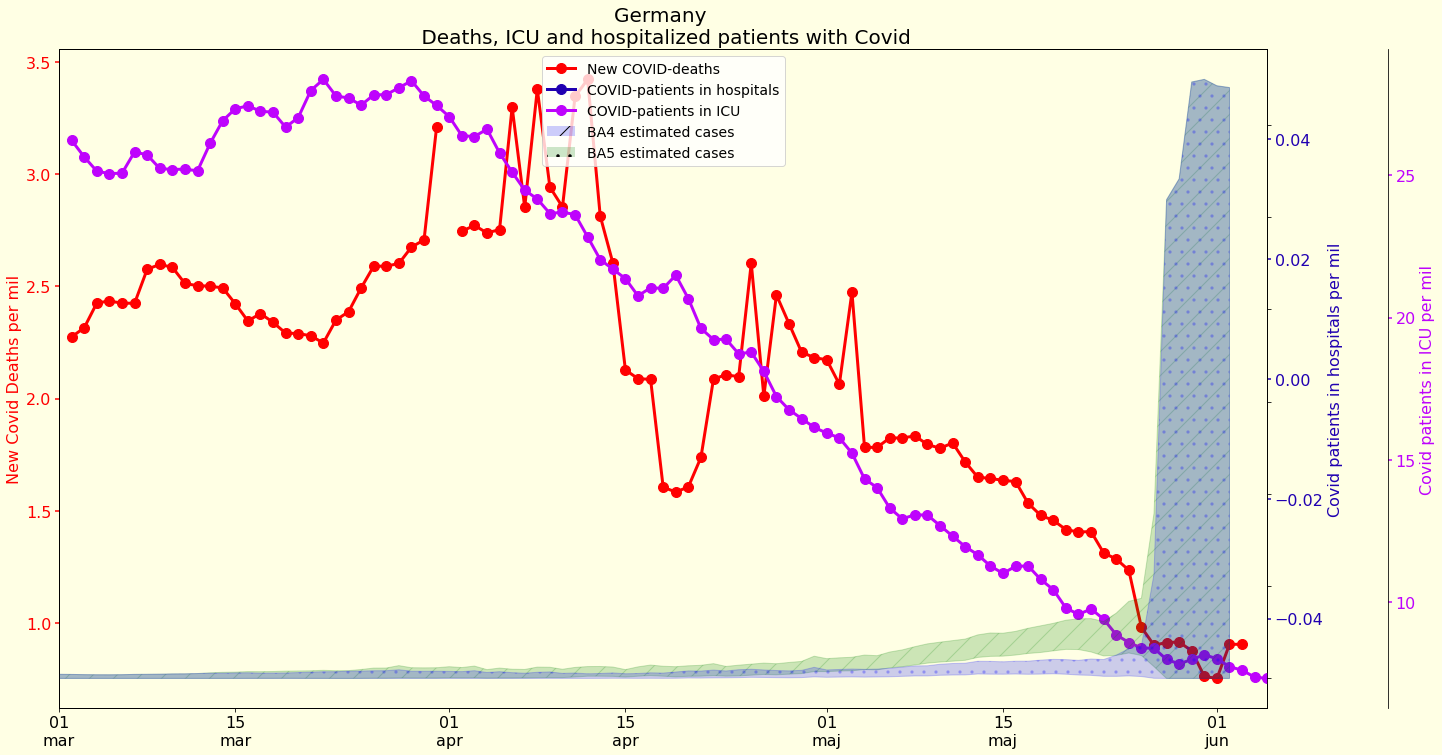

In [7]:
fig3, ax5 = plt.subplots(figsize=(20,10))
fig3.patch.set_facecolor('xkcd:off white')
ax5.set_facecolor('xkcd:off white')


c1,c2,c3 = "xkcd:bright purple","xkcd:ultramarine","red"
ax5.plot(df_owid_loc['date'],df_owid_loc['new_deaths_smoothed_per_million'], label="New COVID-deaths", color=c3, linestyle='-', marker='o')

ax5b = ax5.twinx()
ax5b.plot(df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])['date'], df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])["hosp_patients_per_million"].dropna(), label="COVID-patients in hospitals", color= c2,linestyle='-', marker='o')

ax5c = ax5.twinx()
ax5c.spines.right.set_position(("axes", 1.1))
ax5c.plot(df_owid_loc.dropna(subset=['date', 'icu_patients_per_million'])['date'],df_owid_loc.dropna(subset=['date', 'icu_patients_per_million'])['icu_patients_per_million'], label="COVID-patients in ICU", color= c1 , linestyle='-', marker='o')

ax5.yaxis.label.set_color(c3)
ax5b.yaxis.label.set_color(c2)
ax5c.yaxis.label.set_color(c1)


tkw = dict(size=4, width=1.5)

ax5.set_ylabel("New Covid Deaths per mil")
ax5.tick_params(axis='y', colors=c3, **tkw)

ax5b.set_ylabel("Covid patients in hospitals per mil")
ax5b.tick_params(axis='y', colors=c2, **tkw)

ax5c.set_ylabel("Covid patients in ICU per mil")
ax5c.tick_params(axis='y', colors=c1, **tkw)


ax5d = ax5.twinx()
ax5d.fill_between(BA5_cases['date'], BA5_cases['estimatedCasesCILower'], BA5_cases["estimatedCasesCIUpper"], color='g', alpha=.2, hatch='/')
ax5d.fill_between(BA4_cases['date'], BA4_cases['estimatedCasesCILower'], BA4_cases["estimatedCasesCIUpper"], color='b', alpha=.2, hatch='.')
ax5d.yaxis.set_ticklabels([])

legend_elements = [ Line2D([0], [0], color=c3, linestyle="-", marker="o", label="New COVID-deaths"),
                       Line2D([0],[0], color=c2, linestyle="-", marker="o",label="COVID-patients in hospitals"),
                       Line2D([0],[0], color=c1, linestyle="-", marker="o",label="COVID-patients in ICU"),
                  Patch(facecolor='b', label="BA4 estimated cases", alpha=.2, hatch='/'),
                  Patch(facecolor='g', label="BA5 estimated cases", alpha=.2, hatch='.')
                  ]
ax5.legend(handles=legend_elements, loc='upper center',fontsize=14) # bbox_to_anchor=(0.4,0.7)

ax5.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
# ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
# ymax = 1.1*ymax
# ax5.set_ylim([0,ymax])
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.tight_layout()
ax5.set_title(f"{loc} \n Deaths, ICU and hospitalized patients with Covid")

if saveFigures:
    fig3.savefig(path_figs+f'/Variance figures/{loc} hospitalized, ICU, deaths',bbox_inches='tight')

Text(0.5, 1.0, 'Estimate of new cases')

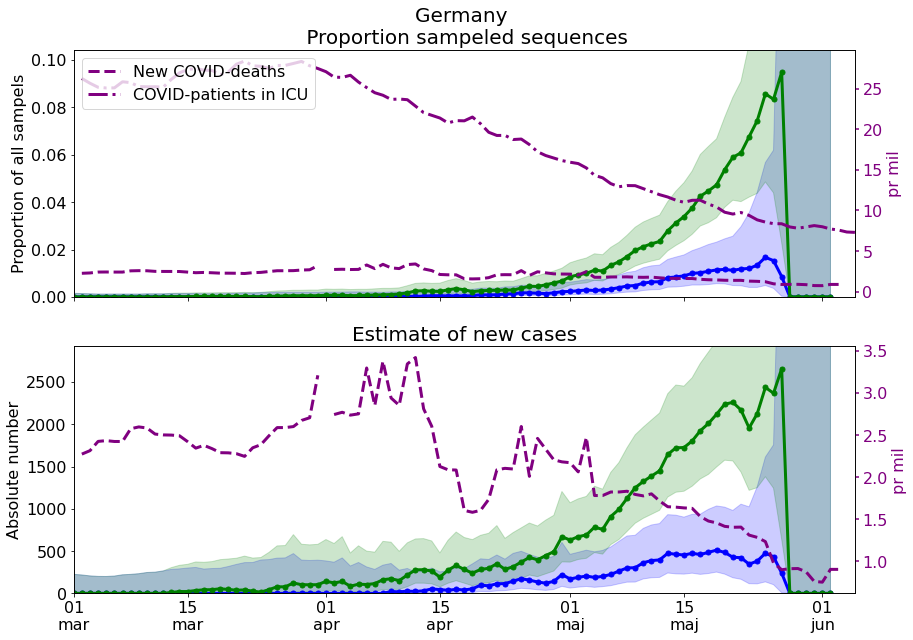

In [8]:
fig4, (ax3,ax4) = plt.subplots(2,1, figsize=(14,10), sharex=True)

#Sampels
ax3.plot(BA4_prop['date'], BA4_prop['estimatedCases'], label="BA4 sampels", color='b', linestyle='-', marker=".")
ax3.fill_between(BA4_prop['date'], BA4_prop['estimatedCasesCILower'], BA4_prop["estimatedCasesCIUpper"], color='b', alpha=.2)

ax3.plot(BA5_prop['date'], BA5_prop['estimatedCases'], label="BA5 sampels", color='g', linestyle='-', marker=".")
ax3.fill_between(BA5_prop['date'], BA5_prop['estimatedCasesCILower'], BA5_prop["estimatedCasesCIUpper"], color='g', alpha=.2)
ax3.set_ylabel("Proportion of all sampels")


ymax = max([BA4_prop['estimatedCases'].max(),BA5_prop['estimatedCases'].max()])
ymax = 1.1*ymax
ax3.set_ylim([0,ymax])

#Cases
ax4.plot(BA4_cases['date'], BA4_cases['estimatedCases'], label="BA4 estimated cases", color='b', linestyle='-', marker=".")
ax4.fill_between(BA4_cases['date'], BA4_cases['estimatedCasesCILower'], BA4_cases["estimatedCasesCIUpper"], color='b', alpha=.2)

ax4.plot(BA5_cases['date'], BA5_cases['estimatedCases'], label="BA5 estimated cases", color='g', linestyle='-', marker=".")
ax4.fill_between(BA5_cases['date'], BA5_cases['estimatedCasesCILower'], BA5_cases["estimatedCasesCIUpper"], color='g', alpha=.2)
ax4.set_ylabel("Absolute number")



ax3b = ax3.twinx()
ax3b.plot(df_owid_loc['date'],df_owid_loc['new_deaths_smoothed_per_million'], label="New COVID-deaths", color="purple",linestyle='--')
#ax3b.plot(df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])['date'], df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])["hosp_patients_per_million"].dropna(), label="COVID-patients in hospitals", color="purple",linestyle=':')
ax3b.plot(df_owid_loc.dropna(subset=['date', 'icu_patients_per_million'])['date'],df_owid_loc.dropna(subset=['date', 'icu_patients_per_million'])['icu_patients_per_million'], label="COVID-patients in ICU", color="purple",linestyle='-.')
ax3b.set_ylabel("pr mil")
ax3b.yaxis.label.set_color("purple")
ax3b.legend(loc=2)

ax4b = ax4.twinx()
ax4b.plot(df_owid_loc['date'],df_owid_loc['new_deaths_smoothed_per_million'], label="New deaths per mil", color="purple",linestyle='--')
ax4b.set_ylabel("pr mil")
ax4b.yaxis.label.set_color("purple")


tkw = dict(size=4, width=1.5)
ax3b.tick_params(axis='y', colors="purple", **tkw)
ax4b.tick_params(axis='y', colors="purple", **tkw)

ax3.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
ymax = 1.1*ymax
ax4.set_ylim([0,ymax])
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax3.set_title(f"{loc} \n Proportion sampeled sequences")
ax4.set_title(f"Estimate of new cases")


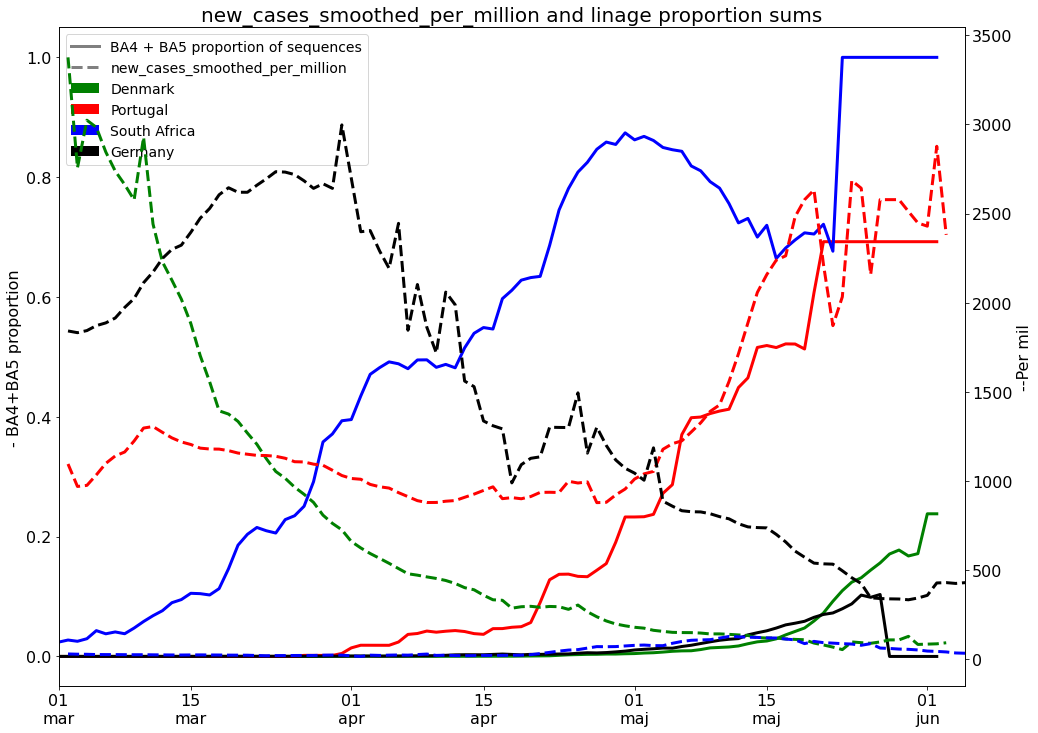

In [9]:
fig, ax = plt.subplots(figsize=(14,10))
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
loc_colors = ["g","r","b","k"]
axx = ax.twinx()
ax.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

#var = 'new_deaths_smoothed_per_million' #'hosp_patients_per_million' , 'icu_patients_per_million', "New cases per mil"
var_list = ['new_deaths_smoothed_per_million','hosp_patients_per_million' , 'icu_patients_per_million', 'new_cases_smoothed_per_million']
var = var_list[3]

#Choose loc
loc = list_of_loc[0]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '0 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[0])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[0], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[1]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]


time_delta = '0 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[1])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[1], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[2]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '0 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[2])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[2], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[3]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '0 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[3])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[3], linestyle='--')

##################################################################################################################
legend_elements = [ Line2D([0], [0], color="grey", linestyle="-", label="BA4 + BA5 proportion of sequences"),
                       Line2D([0],[0], color="grey", linestyle="--", label=var),
                  Patch(facecolor=loc_colors[0], label=list_of_loc[0]),
                  Patch(facecolor=loc_colors[1], label=list_of_loc[1]),
                    Patch(facecolor=loc_colors[2], label=list_of_loc[2]),
                   Patch(facecolor=loc_colors[3], label=list_of_loc[3])
                  ]
ax.legend(handles=legend_elements, loc='upper left',fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.tight_layout()
ax.set_title(f"{var} and linage proportion sums")
ax.set_ylabel("- BA4+BA5 proportion")
axx.set_ylabel("--Per mil")

#Zoom
#ax.set_xlim([datetime.date(2022, 3, 1),datetime.date(2022, 4, 1)])
# ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
# ymax = 1.1*ymax
# ax4.set_ylim([0,ymax])


if saveFigures:
    fig.savefig(path_figs+f'/Variance figures/variance sums vs {var}',bbox_inches='tight')

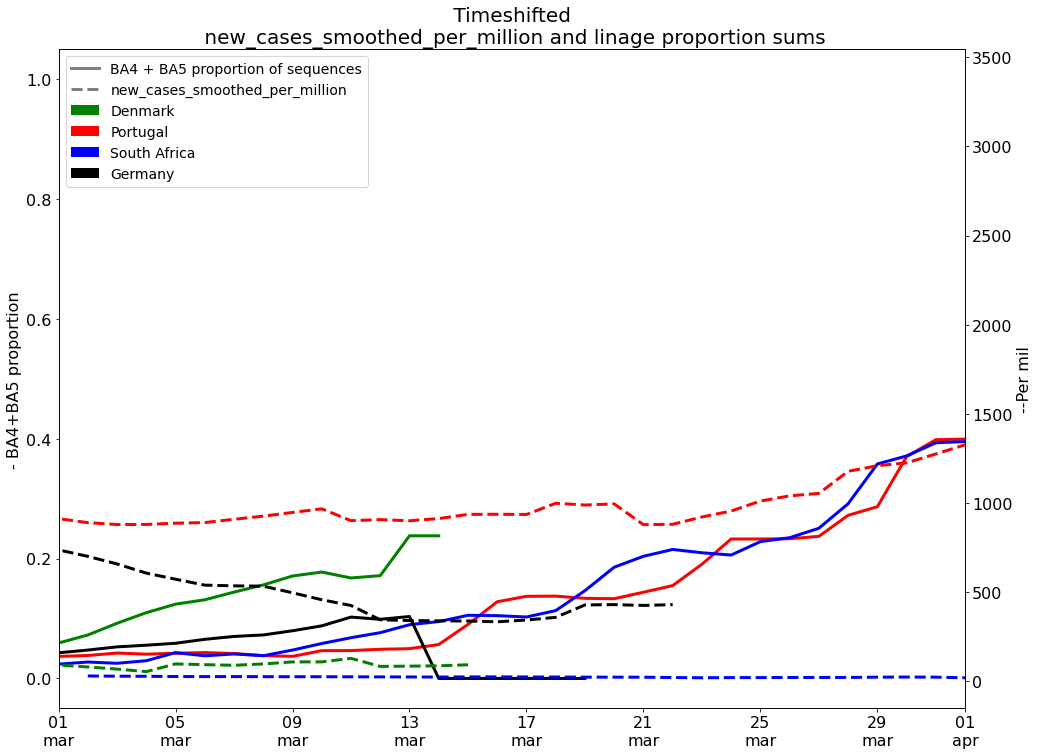

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
loc_colors = ["g","r","b","k"]
axx = ax.twinx()
ax.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

var_list = ['new_deaths_smoothed_per_million','hosp_patients_per_million' , 'icu_patients_per_million', 'new_cases_smoothed_per_million']
var = var_list[3]

#Choose loc
loc = list_of_loc[0]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '80 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[0])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[0], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[1]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]


time_delta = '37 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[1])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[1], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[2]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '0 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[2])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[2], linestyle='--')
##########################################################################################################################

#Choose loc
loc = list_of_loc[3]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = '75 days'
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[3])
axx.plot(df_owid_loc.dropna(subset=['date', var])['date']-pd.Timedelta(time_delta),
         df_owid_loc.dropna(subset=['date', var])[var].dropna(), label=var, color=loc_colors[3], linestyle='--')

##################################################################################################################
legend_elements = [ Line2D([0], [0], color="grey", linestyle="-", label="BA4 + BA5 proportion of sequences"),
                       Line2D([0],[0], color="grey", linestyle="--", label=var),
                  Patch(facecolor=loc_colors[0], label=list_of_loc[0]),
                  Patch(facecolor=loc_colors[1], label=list_of_loc[1]),
                    Patch(facecolor=loc_colors[2], label=list_of_loc[2]),
                   Patch(facecolor=loc_colors[3], label=list_of_loc[3])
                  ]
ax.legend(handles=legend_elements, loc='upper left',fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.tight_layout()
ax.set_title(f" Timeshifted \n {var} and linage proportion sums")
ax.set_ylabel("- BA4+BA5 proportion")
axx.set_ylabel("--Per mil")

#Zoom
ax.set_xlim([datetime.date(2022, 3, 1),datetime.date(2022, 4, 1)])
# ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
# ymax = 1.1*ymax
# ax4.set_ylim([0,ymax])


if saveFigures:
    fig.savefig(path_figs+f'/Variance figures/Time Shifted variance sums vs {var}',bbox_inches='tight')

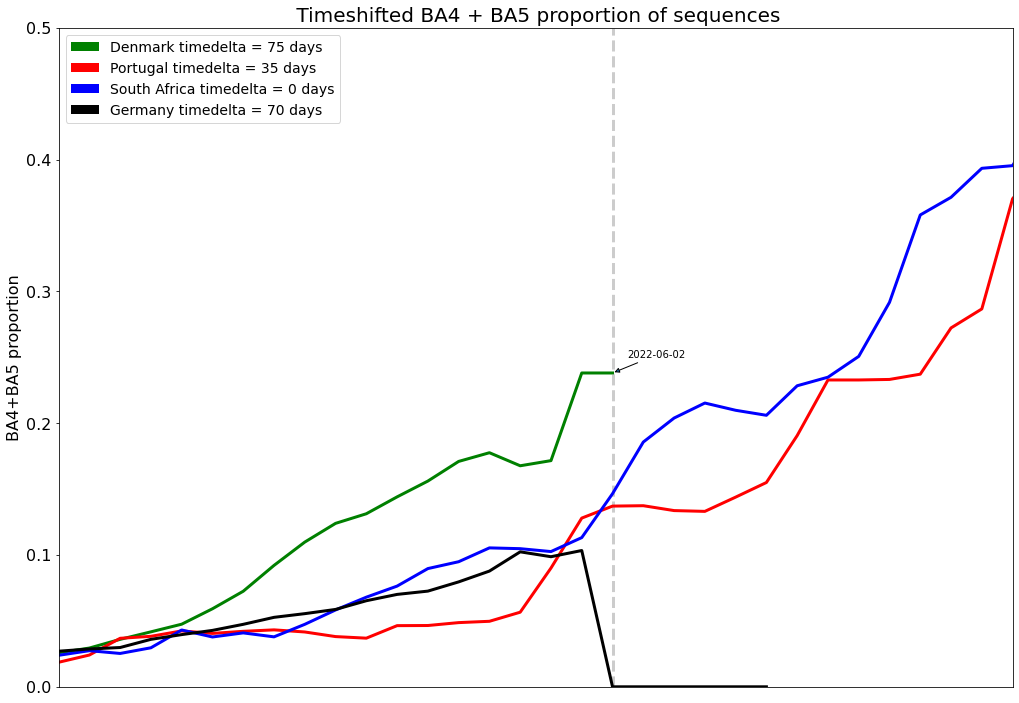

In [11]:
fig, ax = plt.subplots(figsize=(14,10))
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
time_delta_list = ['75 days', '35 days', '0 days', '70 days']
loc_colors = ["g","r","b","k"]
ax.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

var_list = ['new_deaths_smoothed_per_million','hosp_patients_per_million' , 'icu_patients_per_million', 'new_cases_smoothed_per_million']
var = var_list[3]

#Choose loc
loc = list_of_loc[0]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = time_delta_list[0]
time_delta_dk = time_delta 
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[0])

latest_data = BA5_prop['date'].iloc[-1].strftime('%Y-%m-%d')

ax.annotate(f'{latest_data}', (mdates.date2num(BA5_prop['date'].iloc[-1]-pd.Timedelta(time_delta)), BA5_prop['sum'].iloc[-1]), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

ax.axvline(mdates.date2num(BA5_prop['date'].iloc[-1]-pd.Timedelta(time_delta)), linestyle='--', color='grey', alpha=0.4)

#ax.text(BA5_prop['date'].iloc[-1]-pd.Timedelta(time_delta), BA5_prop['sum'].iloc[-1], f"{latest_data.strftime('%Y-%m-%d')}")
##########################################################################################################################

#Choose loc
loc = list_of_loc[1]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]


time_delta = time_delta_list[1]
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[1])

latest_data = BA5_prop['date'].iloc[-1].strftime('%Y-%m-%d')

ax.annotate(f'{latest_data}', (mdates.date2num(BA5_prop['date'].iloc[-1]-pd.Timedelta(time_delta_dk)+pd.Timedelta(time_delta)), BA5_prop['sum'].iloc[-1]), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
##########################################################################################################################

#Choose loc
loc = list_of_loc[2]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = time_delta_list[2] 
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[2])
##########################################################################################################################

#Choose loc
loc = list_of_loc[3]
df_owid_loc = df_owid.loc[df_owid["location"] == loc]

#Cut to match dates

start = pd.Timestamp('2022-3-1')
mask = (df_owid_loc['date'] > start)
df_owid_loc = df_owid_loc.loc[mask]


#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')

BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]

time_delta = time_delta_list[3]
ax.plot(BA5_prop['date']-pd.Timedelta(time_delta), BA5_prop['sum'],
        label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[3])
##################################################################################################################

legend_elements = [Patch(facecolor=loc_colors[i], label=f"{list_of_loc[i]} timedelta = {time_delta_list[i]}") for i in range(4)]
ax.legend(handles=legend_elements, loc='upper left',fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
plt.tight_layout()
ax.set_title(f" Timeshifted BA4 + BA5 proportion of sequences")
ax.set_ylabel("BA4+BA5 proportion")
ax.set_xticks([])
#Zoom
ax.set_xlim([datetime.date(2022, 3, 1),datetime.date(2022, 4, 1)])
# ymax = max([BA4_cases['estimatedCases'].max(),BA5_cases['estimatedCases'].max()])
# ymax = 1.1*ymax
# ax.set_ylim([0,ymax])
ax.set_ylim([0,0.5])



if saveFigures:
    fig.savefig(path_figs+f'/Variance figures/Time Shifted variance sums vs {var}',bbox_inches='tight')

In [12]:
#print(DK_latest_data).dt.strftime('%Y-%m')
#pd.to_datetime(DK_latest_data.dt.strftime('%Y-%m'))



In [13]:
var_dic = {}
for loc in list_of_loc:
    df_owid_loc = df_owid.loc[df_owid["location"] == loc]
    
    start = pd.Timestamp('2022-3-1')
    mask = (df_owid_loc['date'] > start)
    df_owid_loc = df_owid_loc.loc[mask]

    
    #Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
    BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
    BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

    BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
    BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

    #Fix datetime for dfs
    BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
    BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

    BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
    BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')
    
    BA5_prop["sum"] = BA5_prop["estimatedCases"]+BA4_prop["estimatedCases"]
    BA5_cases["sum"] = BA5_cases["estimatedCases"]+BA4_cases["estimatedCases"]
    
    var_merge = pd.merge(left=BA4_prop, left_on="date", right=BA4_cases, right_on="date")
    var_merge = pd.merge(left=var_merge, left_on="date", right=BA5_prop, right_on="date")
    var_merge = pd.merge(left=var_merge, left_on="date", right=BA5_cases, right_on="date")
    
    var_dic[loc] = var_merge
    

# kom_dic = {}

# for i in kommunenavn:

#     kommune_vac_df = df_vacc.loc[df_vacc["kommunenavn"] == i]
#     #firstDate = np.datetime64(kommune_df.loc[kommune_df.index[start],'Dato'])-np.timedelta64(1,'D')
#     lastDate = np.datetime64(kommune_vac_df.loc[kommune_vac_df.index[-1],'Faerdigvacc_dato'])
    
#     # Find number of citizens in region
#     df_kommunekort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',
#                                  delimiter = ';')
#     df_kommunekort = df_kommunekort.set_index("Kommunenavn")

#     # Make row of accumulated vaccinations percentage of pop
#     kommune_vac_df["Kumuleret sum vac"] = kommune_vac_df['Antal faerdigvacc.'].cumsum() 
    
#     kommune_vac_df['Kumuleret procent faerdigvacc.'] = (kommune_vac_df["Kumuleret sum vac"]/antal_borgere(i))*100
    
#     # Make row of accumulated infections percentage of pop
#     kommune_cases_df = df_cases.loc[df_cases["Kommunenavn"] == i]
#     kommune_cases_df["Kumuleret sum tilfælde"] = kommune_cases_df['Bekræftede tilfælde i alt'].cumsum() 
    
#     kommune_cases_df['Kumuleret procent smittede'] = (kommune_cases_df["Kumuleret sum tilfælde"]/antal_borgere(i))*100
    
#     kommune_merge_df = pd.merge(left=kommune_vac_df, left_on='Faerdigvacc_dato',
#          right=kommune_cases_df, right_on='Dato')
#     kom_dic[i] = kommune_merge_df

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_18500/3206089509.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'estimatedCases_x', 'estimatedCasesCILower_x', 'estimatedCasesCIUpper_x'} in the result is deprecated and will raise a MergeError in a future version.
  var_merge = pd.merge(left=var_merge, left_on="date", right=BA5_cases, right_on="date")


NameError: name 'anomal_dic' is not defined

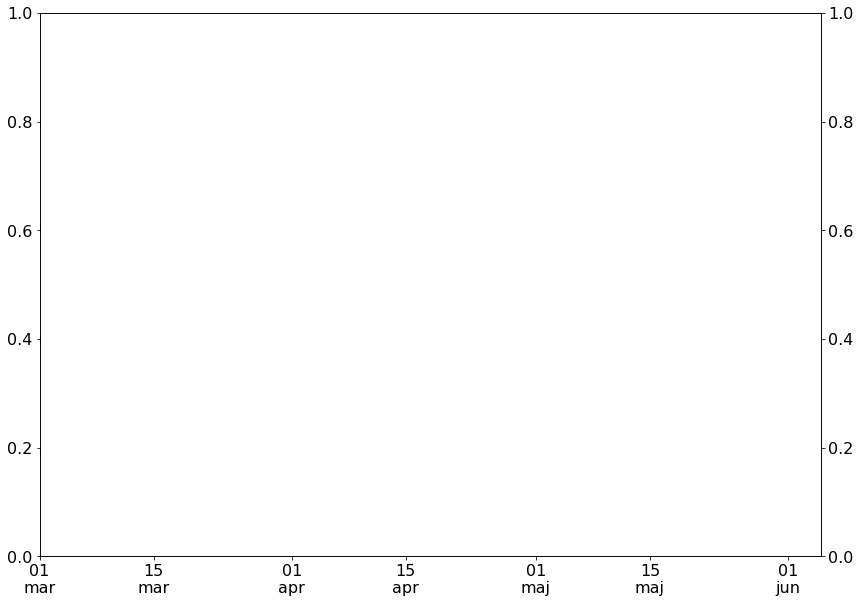

In [14]:
fig5, ax = plt.subplots(figsize=(14,10))
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
loc_colors = ["g","r","b","k"]
i = 0
# compare = 
axx = ax.twinx()
ax.set_xlim([datetime.date(2022, 3, 1),df_owid_loc['date'].max()])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
for loc in list_of_loc:
    #Choose loc
    df_owid_loc = df_owid.loc[df_owid["location"] == loc]

    #Cut to match dates

    start = pd.Timestamp('2022-3-1')
    mask = (df_owid_loc['date'] > start)
    df_owid_loc = df_owid_loc.loc[mask]
    
    #ax.plot(BA5_cases['date'], BA5_cases['sum'], label="BA4 + BA5 case estimate", linestyle='-')
    ax.plot(anomal_dic[loc][BA5_prop['date']], BA5_prop['sum'], label="BA4 + BA5 proportion of sequences", linestyle='-', color=loc_colors[i])
    axx.plot(df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])['date'], df_owid_loc.dropna(subset=['date', 'hosp_patients_per_million'])["hosp_patients_per_million"].dropna(), label="COVID-patients in hospitals", color=loc_colors[i], linestyle='--')
    i = i+1

In [ ]:
first_index = BA5_prop.ne(0).idxmax()["estimatedCases"]
max_index = BA5_prop.idxmax()["estimatedCases"]
BA5_prop.iloc[first_index]

In [ ]:
#list_of_loc = ["DK","P","SA","DE"]
list_of_loc = ["Denmark", "Portugal", "South Africa", "Germany" ]
#Choose country
loc = list_of_loc[3]

#Load data from https://cov-spectrum.org/explore/Denmark/AllSamples/Past6M/variants
BA4_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA4_cases.csv")
BA4_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA4_proportion_of_sequences.csv")

BA5_cases = pd.read_csv(rootdir_data + "/"+loc + "/"+loc+"_BA5_cases.csv")
BA5_prop = pd.read_csv(rootdir_data + "/"+loc + "/"+loc + "_BA5_proportion_of_sequences.csv")

#Fix datetime for dfs
BA4_prop["date"] = pd.to_datetime(BA4_prop.date, format='%Y-%m-%d')
BA4_cases["date"] = pd.to_datetime(BA4_cases.date, format='%Y-%m-%d')

BA5_prop["date"] = pd.to_datetime(BA5_prop.date, format='%Y-%m-%d')
BA5_cases["date"] = pd.to_datetime(BA5_cases.date, format='%Y-%m-%d')
